## 결정 트리
* 분류와 회귀 문제에 널리 사용하는 모델
* 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면 학습
    * 스무고개 놀이의 질문과 비슷

In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

In [18]:
mglearn.plots.plot_animal_tree()

ModuleNotFoundError: No module named 'graphviz'

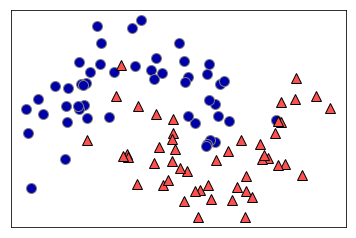

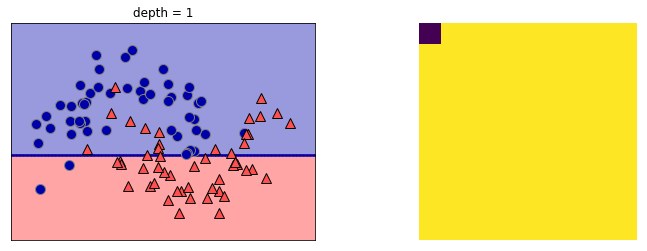

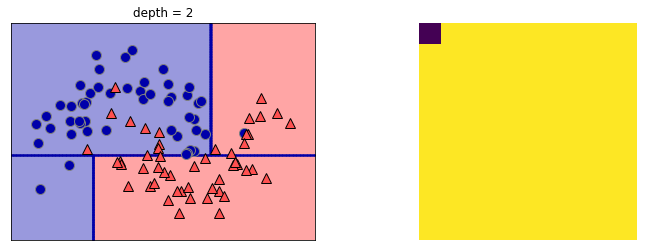

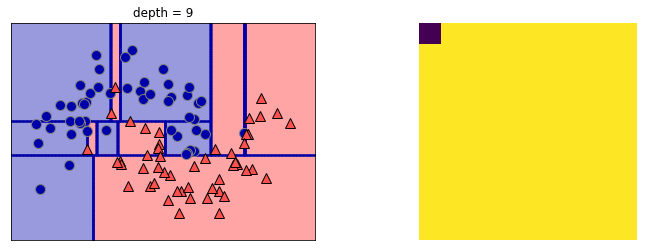

In [19]:
mglearn.plots.plot_tree_progressive()

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy of training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy of test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy of training set: 1.000
Accuracy of test set: 0.937


In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy of training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy of test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy of training set: 0.988
Accuracy of test set: 0.951


In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["bad", "good"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [10]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ModuleNotFoundError: No module named 'graphviz'

In [11]:
print("Feature importancy:\n{}".format(tree.feature_importances_))

Feature importancy:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


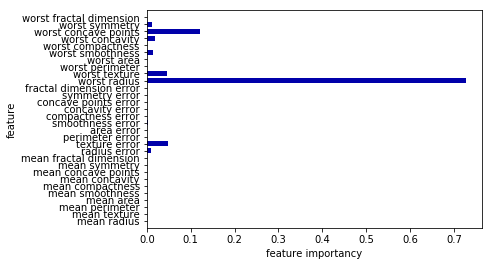

In [14]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importancy")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

In [15]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

ModuleNotFoundError: No module named 'graphviz'

Text(0,0.5,'price ($/Mbyte_')

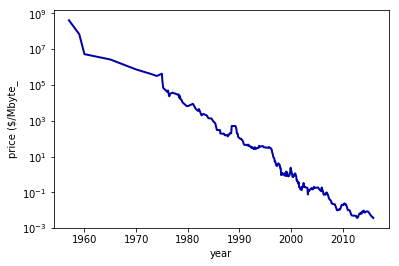

In [20]:
import pandas as pd
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte_")

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전 데이터는 훈련 데이터
# 2000년 이후 데이터는 테스트 데이터
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만 이용
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃의 관게를 간단하게 만들기 위해 로그 스케일로 변경
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌림
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

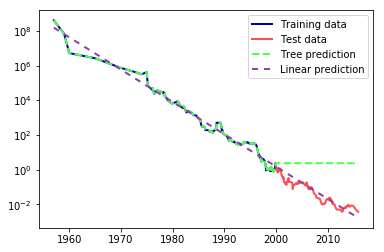

In [23]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

### 장단점과 매개변수
* 결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수
    * max_depth
    * max_leaf_nodes
    * min_samples_leaf
    * 위 3개 중 하나만 지정해도 과대적합을 막는 데 충분
    
* 장점
    - 1. 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉬움 (단, 비교적 작은 트리일 때)
    - 2. 데이터 스케일에 구애받지 않음
        - 각 특성이 개별적으로 처리되어 데이터를 분할 -> 데이터 스케일의 영향을 받지 않으므로 특성의 정규하나 표준화 같은 전처리 과정이 필요 없음
        - 특히 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동
        
* 단점
    - 1. 사전 가지치기를 사용함에도 불구하고 과대적합이 되는 경향이 있어 일반화 성능이 좋지 못함